In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [4]:
df = pd.read_csv(r'C:\Users\scrap\OneDrive\Desktop\vgsales_cleaned.csv', index_col = False)

In [10]:
df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
df.dropna(inplace = True)

In [9]:
df.columns = ['Unnamed: 0', 'Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

<Axes: xlabel='Year'>

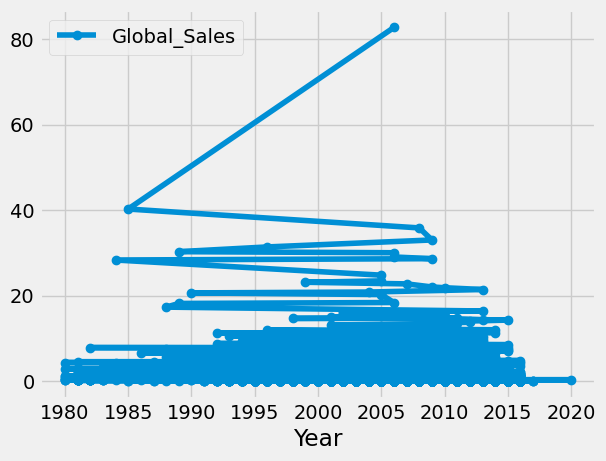

In [11]:
df.plot(x='Year', y='Global_Sales', marker='o', linestyle='-')

In [12]:
#Even though it is a bit hard to tell since there are so many zero's, globally the sales seem to have peaked during the mid-latye 80's and continued a trend up til 2015.

In [18]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Year'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.163512e+01
p-value                        2.214314e-21
Number of Lags Used            4.300000e+01
Number of Observations Used    1.624700e+04
Critical Value (1%)           -3.430753e+00
Critical Value (5%)           -2.861718e+00
Critical Value (10%)          -2.566865e+00
dtype: float64


In [21]:
df.drop(columns=['Rank', 'Name', 'Platform', 'Publisher', 'Genre'], inplace=True)

In [22]:
df.head()

,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,2006.0,41.49,29.02,3.77,8.46,82.74
1,1,1985.0,29.08,3.58,6.81,0.77,40.24
2,2,2008.0,15.85,12.88,3.79,3.31,35.82
3,3,2009.0,15.75,11.01,3.28,2.96,33.00
4,4,1996.0,11.27,8.89,10.22,1.00,31.37


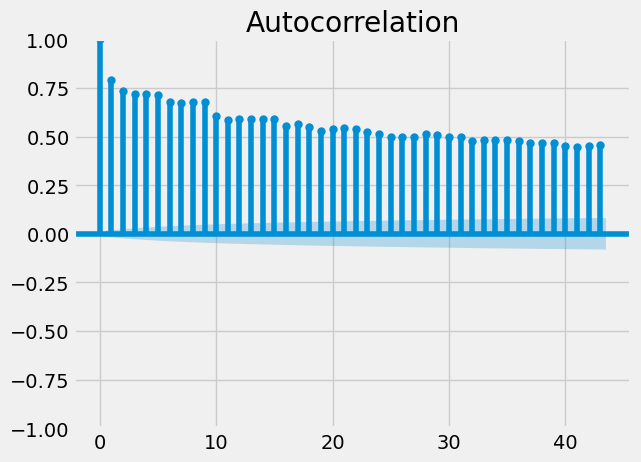

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt


plot_acf(df['NA_Sales'])
plt.show()

In [29]:
x = df.values.ravel()